In [1]:
import pandas as pd
import numpy as np
import math
import operator
from collections import Counter
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('EXTENDED_1.csv',encoding = 'unicode_escape')


In [3]:
df

,Timestamp,Score,ID,Gender,Height,Weight,CGPA,Daily spent time in social media (hour),Hometown,How many days in a week you feel more energetic,...,Are you eager to harm yourself to defend your beliefs?,"How frequently you visit a doctor within a year""",How many people do you follow on social media?,How much time you spend in university without academic curriculum(in hour)?,Are you rich in vocabulary?,"Class note taking tendency(High,Low,Medium)","Theory class attendance(h,l,m)","Theory class interest(h,l,m)","Lab interest(h,l,m)",Preference(class lectures cl or online tutorials)
0,3/27/2019 12:37:01,0 / 1,151340905.0,Female,5.2,58.0,3.930,2-May,Comilla,1-Feb,...,No,2,20,1.0,Maybe,High,h,Medium,Medium,Online tutorials
1,3/29/2019 1:19:02,0 / 1,151341043.0,Male,5 feet 8 inch,70.0,3.845,2-May,Munshiganj,2,...,Yes,2,250,0.0,No,High,High,High,High,Class lectures
2,3/27/2019 12:52:17,0 / 1,151340925.0,Male,5.4,60.0,3.830,Below 1 hour,Barisal,3,...,No,6,50,6.0,Yes,High,h,High,High,Online tutorials
3,3/27/2019 12:45:16,0 / 1,151340912.0,Male,5.85,68.0,3.800,2-May,Barisal,2,...,No,2,220,2.0,Maybe,High,h,High,High,Online tutorials
4,3/27/2019 12:39:08,0 / 1,151340898.0,Female,5.5,60.0,3.770,2-May,Dhaka,3,...,No,1,20,3.0,Yes,Low,m,Medium,High,Online tutorials
5,3/24/2019 14:46:23,0 / 1,151341027.0,Male,5.1,70.0,3.760,2-May,Pabna,3,...,Maybe,5,10,2.0,No,High,h,Medium,High,Online tutorials
6,3/24/2019 14:33:55,0 / 1,151341011.0,Male,161.544,59.0,3.720,2-May,kishoregonj,1-Feb,...,Maybe,1-2 times on average,5-Oct,NaN,No,High,h,High,High,Class lectures
7,3/24/2019 14:41:32,0 / 1,151341004.0,Male,5'6'',70.0,3.710,Below 1 hour,Feni,4,...,No,10,113,1.0,Yes,High,h,High,High,Class lectures
8,3/25/2019 14:32:02,0 / 1,151341000.0,Female,"5'2""",52.0,3.690,2-May,Comilla,2,...,Maybe,rarely,300,0.5,No,High,h,Low,Medium,Online tutorials
9,3/27/2019 13:05:39,0 / 1,151340923.0,Male,"5'5""",67.0,3.680,2-May,Dhaka,5,...,No,1,50,1.0,Yes,High,h,High,High,Class lectures


In [4]:
df1=df[:103]

In [5]:
df1.head()

,Timestamp,Score,ID,Gender,Height,Weight,CGPA,Daily spent time in social media (hour),Hometown,How many days in a week you feel more energetic,...,Are you eager to harm yourself to defend your beliefs?,"How frequently you visit a doctor within a year""",How many people do you follow on social media?,How much time you spend in university without academic curriculum(in hour)?,Are you rich in vocabulary?,"Class note taking tendency(High,Low,Medium)","Theory class attendance(h,l,m)","Theory class interest(h,l,m)","Lab interest(h,l,m)",Preference(class lectures cl or online tutorials)
0,3/27/2019 12:37:01,0 / 1,151340905.0,Female,5.2,58.0,3.930,2-May,Comilla,1-Feb,...,No,2,20,1.0,Maybe,High,h,Medium,Medium,Online tutorials
1,3/29/2019 1:19:02,0 / 1,151341043.0,Male,5 feet 8 inch,70.0,3.845,2-May,Munshiganj,2,...,Yes,2,250,0.0,No,High,High,High,High,Class lectures
2,3/27/2019 12:52:17,0 / 1,151340925.0,Male,5.4,60.0,3.830,Below 1 hour,Barisal,3,...,No,6,50,6.0,Yes,High,h,High,High,Online tutorials
3,3/27/2019 12:45:16,0 / 1,151340912.0,Male,5.85,68.0,3.800,2-May,Barisal,2,...,No,2,220,2.0,Maybe,High,h,High,High,Online tutorials
4,3/27/2019 12:39:08,0 / 1,151340898.0,Female,5.5,60.0,3.770,2-May,Dhaka,3,...,No,1,20,3.0,Yes,Low,m,Medium,High,Online tutorials


In [6]:
df1=df1.sort_values('ID')

In [7]:
df1

,Timestamp,Score,ID,Gender,Height,Weight,CGPA,Daily spent time in social media (hour),Hometown,How many days in a week you feel more energetic,...,Are you eager to harm yourself to defend your beliefs?,"How frequently you visit a doctor within a year""",How many people do you follow on social media?,How much time you spend in university without academic curriculum(in hour)?,Are you rich in vocabulary?,"Class note taking tendency(High,Low,Medium)","Theory class attendance(h,l,m)","Theory class interest(h,l,m)","Lab interest(h,l,m)",Preference(class lectures cl or online tutorials)
99,3/29/2019 0:23:23,0 / 1,121440946.0,Male,5 ft 10 inch,90.0,2.340,Below 1 hour,Comilla,5,...,No,3,20,2.0,Yes,Medium,H,Medium,Medium,Online tutorials
95,3/29/2019 3:00:10,0 / 1,131440910.0,Female,"5'3""",42.0,2.500,2-May,Bogra,4,...,No,sometimes,few,0.0,Maybe,Medium,m,Medium,High,Class lectures
86,3/28/2019 23:40:52,0 / 1,131440969.0,Male,5.4,60.0,2.800,2-May,Narsinghdi,3,...,Maybe,5,10,1.0,Maybe,Medium,h,Medium,Medium,Online tutorials
97,3/28/2019 23:17:47,0 / 1,141340900.0,Male,5'8'',70.0,2.470,Above 5 hour,Rajshahi,5,...,Yes,1,200,0.0,Maybe,Low,NaN,NaN,Medium,Online tutorials
14,3/24/2019 15:31:24,0 / 1,141440899.0,Female,156cm,76.0,3.620,2-May,Chittagong,3,...,No,3 times,100,2.0,Maybe,High,h,High,Medium,Class lectures
82,3/24/2019 15:32:33,0 / 1,141440945.0,Male,5 feet 10.5 inches,72.0,2.880,2-May,Kushtia,4,...,No,0,200,0.0,Maybe,High,High,Medium,High,Online tutorials
100,3/31/2019 10:56:25,0 / 1,141440962.0,Male,5.6,64.0,NaN,2-May,Mymensingh,4,...,Maybe,2-Mar,5-Jun,NaN,No,Low,M,Low,Medium,Online tutorials
98,3/30/2019 0:52:07,0 / 1,141440980.0,Male,5.5 ft,57.0,2.400,Below 1 hour,Dhaka,5,...,Yes,2-Mar,20,1.0,Yes,Medium,h,Medium,High,Class lectures
85,3/27/2019 12:44:36,0 / 1,151340894.0,Male,6 feet,73.0,2.840,2-May,Comilla,5,...,No,2,15,3.0,Maybe,Low,90%,Low,Medium,Online tutorials
18,3/27/2019 12:41:13,0 / 1,151340897.0,Male,"6.0""",85.0,3.530,Below 1 hour,Brahmanbaria,5,...,No,less frequent,very few,1.0,Maybe,Medium,h,High,Medium,Online tutorials


In [8]:
ef1 = pd.read_csv('Extended_version_3.csv')

In [9]:
ef1

,Timestamp,Total score,ID,ID [Score],ID [Feedback],what kind of foods you generally eat in the breakfast time?,what kind of foods you generally eat in the breakfast time? [Score],what kind of foods you generally eat in the breakfast time? [Feedback],number of private tuition or part time activities,number of private tuition or part time activities [Score],...,Do you agree with this statement? - 'Look does not matter' a)Yes b)No [Feedback],Mobile games are- a)fun and interesting b) boring and waste of time c) do not care,Mobile games are- a)fun and interesting b) boring and waste of time c) do not care [Score],Mobile games are- a)fun and interesting b) boring and waste of time c) do not care [Feedback],Favorite mobile game genre is- a) War game b) Racing c) Puzzle,Favorite mobile game genre is- a) War game b) Racing c) Puzzle [Score],Favorite mobile game genre is- a) War game b) Racing c) Puzzle [Feedback],study time (hour),study time (hour) [Score],study time (hour) [Feedback]
0,2019/04/04 12:41:29 PM GMT+6,0.00 / 2,151341038,-- / 0,NaN,Fruits and oats,-- / 1,NaN,1,-- / 1,...,NaN,C,-- / 0,NaN,C,-- / 0,NaN,4,-- / 0,NaN
1,2019/04/04 12:54:50 PM GMT+6,0.00 / 2,151341011,-- / 0,NaN,bread or rice,-- / 1,NaN,0,-- / 1,...,NaN,C,-- / 0,NaN,NaN,NaN,NaN,2,-- / 0,NaN
2,2019/04/04 1:00:14 PM GMT+6,0.00 / 2,151340926,-- / 0,NaN,carbohydrate,-- / 1,NaN,1,-- / 1,...,NaN,a,-- / 0,NaN,A,-- / 0,NaN,2,-- / 0,NaN
3,2019/04/04 1:03:30 PM GMT+6,0.00 / 2,151341008,-- / 0,NaN,Breads and egg,-- / 1,NaN,0,-- / 1,...,NaN,C,-- / 0,NaN,C,-- / 0,NaN,1,-- / 0,NaN
4,2019/04/04 1:03:40 PM GMT+6,0.00 / 2,151340950,-- / 0,NaN,Bread and Butter,-- / 1,NaN,4,-- / 1,...,NaN,a,-- / 0,NaN,A,-- / 0,NaN,5,-- / 0,NaN
5,2019/04/04 1:06:49 PM GMT+6,0.00 / 2,141440945,-- / 0,NaN,bread and vegetables,-- / 1,NaN,3,-- / 1,...,NaN,a,-- / 0,NaN,B,-- / 0,NaN,5,-- / 0,NaN
6,2019/04/04 1:07:54 PM GMT+6,0.00 / 2,151340938,-- / 0,NaN,Ruti and egg,-- / 1,NaN,0,-- / 1,...,NaN,C,-- / 0,NaN,C,-- / 0,NaN,3,-- / 0,NaN
7,2019/04/04 1:12:07 PM GMT+6,0.00 / 2,151340903,-- / 0,NaN,Bread,-- / 1,NaN,2,-- / 1,...,NaN,C,-- / 0,NaN,C,-- / 0,NaN,3,-- / 0,NaN
8,2019/04/04 1:16:06 PM GMT+6,0.00 / 2,151341006,-- / 0,NaN,"egg, ruti",-- / 1,NaN,0,-- / 1,...,NaN,a,-- / 0,NaN,C,-- / 0,NaN,2,-- / 0,NaN
9,2019/04/04 1:19:08 PM GMT+6,0.00 / 2,151341035,-- / 0,NaN,rice,-- / 1,NaN,0,-- / 1,...,NaN,a,-- / 0,NaN,A,-- / 0,NaN,2,-- / 0,NaN


In [10]:
ef1=ef1.sort_values('ID')

In [11]:
ef1

,Timestamp,Total score,ID,ID [Score],ID [Feedback],what kind of foods you generally eat in the breakfast time?,what kind of foods you generally eat in the breakfast time? [Score],what kind of foods you generally eat in the breakfast time? [Feedback],number of private tuition or part time activities,number of private tuition or part time activities [Score],...,Do you agree with this statement? - 'Look does not matter' a)Yes b)No [Feedback],Mobile games are- a)fun and interesting b) boring and waste of time c) do not care,Mobile games are- a)fun and interesting b) boring and waste of time c) do not care [Score],Mobile games are- a)fun and interesting b) boring and waste of time c) do not care [Feedback],Favorite mobile game genre is- a) War game b) Racing c) Puzzle,Favorite mobile game genre is- a) War game b) Racing c) Puzzle [Score],Favorite mobile game genre is- a) War game b) Racing c) Puzzle [Feedback],study time (hour),study time (hour) [Score],study time (hour) [Feedback]
54,2019/04/04 8:47:48 PM GMT+6,0.00 / 2,121440946,-- / 0,NaN,roti,-- / 1,NaN,1,-- / 1,...,NaN,C,-- / 0,NaN,C,-- / 0,NaN,4,-- / 0,NaN
15,2019/04/04 2:44:19 PM GMT+6,0.00 / 2,131440910,-- / 0,NaN,Bread,-- / 1,NaN,2,-- / 1,...,NaN,C,-- / 0,NaN,C,-- / 0,NaN,3,-- / 0,NaN
27,2019/04/04 5:54:27 PM GMT+6,0.00 / 2,141340900,-- / 0,NaN,nothing,-- / 1,NaN,0,-- / 1,...,NaN,a,-- / 0,NaN,A,-- / 0,NaN,1,-- / 0,NaN
5,2019/04/04 1:06:49 PM GMT+6,0.00 / 2,141440945,-- / 0,NaN,bread and vegetables,-- / 1,NaN,3,-- / 1,...,NaN,a,-- / 0,NaN,B,-- / 0,NaN,5,-- / 0,NaN
65,2019/04/04 10:56:49 PM GMT+6,0.00 / 2,141440962,-- / 0,NaN,Light food,-- / 1,NaN,None,-- / 1,...,NaN,C,-- / 0,NaN,A,-- / 0,NaN,1,-- / 0,NaN
77,2019/04/06 4:51:19 AM GMT+6,0.00 / 2,151340894,-- / 0,NaN,light,-- / 1,NaN,0,-- / 1,...,NaN,C,-- / 0,NaN,A,-- / 0,NaN,1,-- / 0,NaN
24,2019/04/04 5:44:02 PM GMT+6,0.00 / 2,151340897,-- / 0,NaN,Ruti,-- / 1,NaN,Reading Newspaper,-- / 1,...,NaN,B,-- / 0,NaN,A,-- / 0,NaN,6,-- / 0,NaN
61,2019/04/04 10:02:23 PM GMT+6,0.00 / 2,151340898,-- / 0,NaN,Serial,-- / 1,NaN,2,-- / 1,...,NaN,a,-- / 0,NaN,B,-- / 0,NaN,3,-- / 0,NaN
72,2019/04/05 12:23:44 AM GMT+6,0.00 / 2,151340901,-- / 0,NaN,Bread,-- / 1,NaN,0,-- / 1,...,NaN,a,-- / 0,NaN,C,-- / 0,NaN,4,-- / 0,NaN
40,2019/04/04 7:18:26 PM GMT+6,0.00 / 2,151340902,-- / 0,NaN,"bread, egg, vegetable",-- / 1,NaN,0,-- / 1,...,NaN,B,-- / 0,NaN,C,-- / 0,NaN,2,-- / 0,NaN


In [12]:
fdf=pd.merge(df1,ef1,on="ID")

In [13]:
fdf

,Timestamp_x,Score,ID,Gender,Height,Weight,CGPA,Daily spent time in social media (hour),Hometown,How many days in a week you feel more energetic,...,Do you agree with this statement? - 'Look does not matter' a)Yes b)No [Feedback],Mobile games are- a)fun and interesting b) boring and waste of time c) do not care,Mobile games are- a)fun and interesting b) boring and waste of time c) do not care [Score],Mobile games are- a)fun and interesting b) boring and waste of time c) do not care [Feedback],Favorite mobile game genre is- a) War game b) Racing c) Puzzle,Favorite mobile game genre is- a) War game b) Racing c) Puzzle [Score],Favorite mobile game genre is- a) War game b) Racing c) Puzzle [Feedback],study time (hour),study time (hour) [Score],study time (hour) [Feedback]
0,3/29/2019 0:23:23,0 / 1,1.21441e+08,Male,5 ft 10 inch,90.0,2.340,Below 1 hour,Comilla,5,...,NaN,C,-- / 0,NaN,C,-- / 0,NaN,4,-- / 0,NaN
1,3/29/2019 3:00:10,0 / 1,1.31441e+08,Female,"5'3""",42.0,2.500,2-May,Bogra,4,...,NaN,C,-- / 0,NaN,C,-- / 0,NaN,3,-- / 0,NaN
2,3/28/2019 23:17:47,0 / 1,1.41341e+08,Male,5'8'',70.0,2.470,Above 5 hour,Rajshahi,5,...,NaN,a,-- / 0,NaN,A,-- / 0,NaN,1,-- / 0,NaN
3,3/24/2019 15:32:33,0 / 1,1.41441e+08,Male,5 feet 10.5 inches,72.0,2.880,2-May,Kushtia,4,...,NaN,a,-- / 0,NaN,B,-- / 0,NaN,5,-- / 0,NaN
4,3/31/2019 10:56:25,0 / 1,1.41441e+08,Male,5.6,64.0,NaN,2-May,Mymensingh,4,...,NaN,C,-- / 0,NaN,A,-- / 0,NaN,1,-- / 0,NaN
5,3/27/2019 12:44:36,0 / 1,1.51341e+08,Male,6 feet,73.0,2.840,2-May,Comilla,5,...,NaN,C,-- / 0,NaN,A,-- / 0,NaN,1,-- / 0,NaN
6,3/27/2019 12:41:13,0 / 1,1.51341e+08,Male,"6.0""",85.0,3.530,Below 1 hour,Brahmanbaria,5,...,NaN,B,-- / 0,NaN,A,-- / 0,NaN,6,-- / 0,NaN
7,3/27/2019 12:39:08,0 / 1,1.51341e+08,Female,5.5,60.0,3.770,2-May,Dhaka,3,...,NaN,a,-- / 0,NaN,B,-- / 0,NaN,3,-- / 0,NaN
8,3/27/2019 12:45:49,0 / 1,1.51341e+08,Male,5'8'',82.0,3.246,2-May,"Kurigram, Rangpur",4,...,NaN,a,-- / 0,NaN,C,-- / 0,NaN,4,-- / 0,NaN
9,3/27/2019 12:43:20,0 / 1,1.51341e+08,Female,5''5',61.0,3.460,2-May,kishoreganj,3,...,NaN,B,-- / 0,NaN,C,-- / 0,NaN,2,-- / 0,NaN


In [14]:
fdf.to_csv('ria.csv')

In [15]:
fdf.drop(fdf.columns.difference(['ID','CGPA','Sleep duration','How much time you spend in university without academic curriculum(in hour)?','study time (hour)']), 1, inplace=True)

In [16]:
fdf

,ID,CGPA,Sleep duration,How much time you spend in university without academic curriculum(in hour)?,study time (hour)
0,1.21441e+08,2.340,6.0,2.0,4
1,1.31441e+08,2.500,6.0,0.0,3
2,1.41341e+08,2.470,5.0,0.0,1
3,1.41441e+08,2.880,5.0,0.0,5
4,1.41441e+08,NaN,6.0,NaN,1
5,1.51341e+08,2.840,8.0,3.0,1
6,1.51341e+08,3.530,6.0,1.0,6
7,1.51341e+08,3.770,6.0,3.0,3
8,1.51341e+08,3.246,5.0,2.0,4
9,1.51341e+08,3.460,8.0,4.0,2


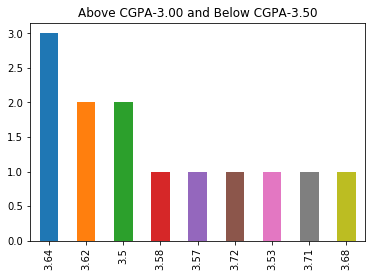

In [17]:
#better cgpa
x = fdf[ (fdf['CGPA']>=3.50) & (fdf['CGPA']<3.75)]
fdf.head(40)
x['CGPA'].value_counts().head(30).plot(kind = 'bar', title = 'Above CGPA-3.00 and Below CGPA-3.50')

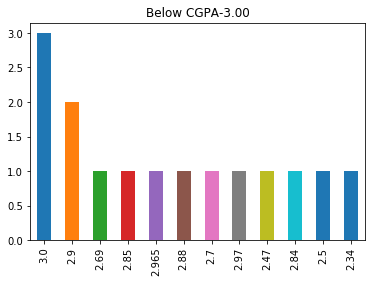

In [18]:
#poor cgpa
x = fdf[ (fdf['CGPA']<=3.00)]
fdf.head(40)
x['CGPA'].value_counts().head(30).plot(kind = 'bar', title = 'Below CGPA-3.00')

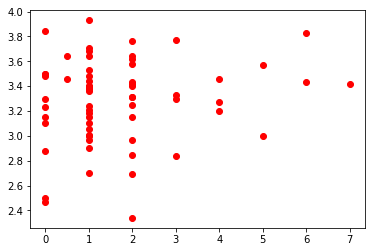

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(fdf['How much time you spend in university without academic curriculum(in hour)?'], fdf['CGPA'], 'ro')

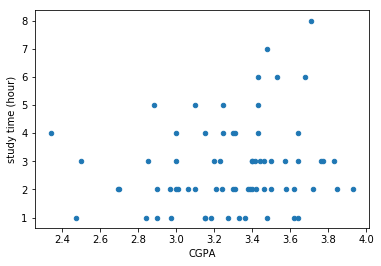

In [20]:
fdf.plot(kind = 'scatter', x = 'CGPA', y = 'study time (hour)')

Text(0,0.5,'Person')

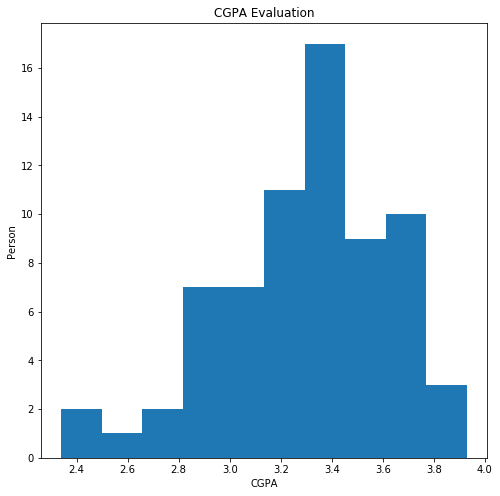

In [21]:
fig = plt.figure(figsize=(8,8))
x = fig.gca()  
fdf['CGPA'].plot.hist(x = x)
x.set_title('CGPA Evaluation')
x.set_xlabel('CGPA')
x.set_ylabel('Person')

Text(0,0.5,'CGPA')

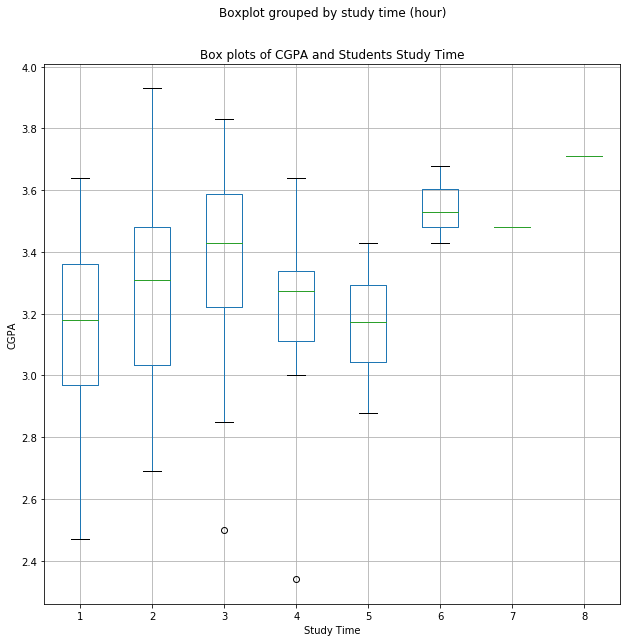

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
fdf[['CGPA','study time (hour)']].boxplot(by = 'study time (hour)', ax = ax)

ax.set_title('Box plots of CGPA and Students Study Time') 
ax.set_xlabel('Study Time')
ax.set_ylabel('CGPA')

In [23]:
fdf[pd.to_numeric(df['Sleep duration'],errors='coerce').notnull()]
fdf[pd.to_numeric(df['CGPA'],errors='coerce').notnull()]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ID,CGPA,Sleep duration,How much time you spend in university without academic curriculum(in hour)?,study time (hour)
0,1.21441e+08,2.340,6.0,2.0,4
1,1.31441e+08,2.500,6.0,0.0,3
2,1.41341e+08,2.470,5.0,0.0,1
3,1.41441e+08,2.880,5.0,0.0,5
4,1.41441e+08,NaN,6.0,NaN,1
5,1.51341e+08,2.840,8.0,3.0,1
6,1.51341e+08,3.530,6.0,1.0,6
7,1.51341e+08,3.770,6.0,3.0,3
8,1.51341e+08,3.246,5.0,2.0,4
9,1.51341e+08,3.460,8.0,4.0,2


In [24]:
fdf.fillna(0)

,ID,CGPA,Sleep duration,How much time you spend in university without academic curriculum(in hour)?,study time (hour)
0,121440946.0,2.340,6.0,2.0,4
1,131440910.0,2.500,6.0,0.0,3
2,141340900.0,2.470,5.0,0.0,1
3,141440945.0,2.880,5.0,0.0,5
4,141440962.0,0.000,6.0,0.0,1
5,151340894.0,2.840,8.0,3.0,1
6,151340897.0,3.530,6.0,1.0,6
7,151340898.0,3.770,6.0,3.0,3
8,151340901.0,3.246,5.0,2.0,4
9,151340902.0,3.460,8.0,4.0,2


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5,0,'CGPA')

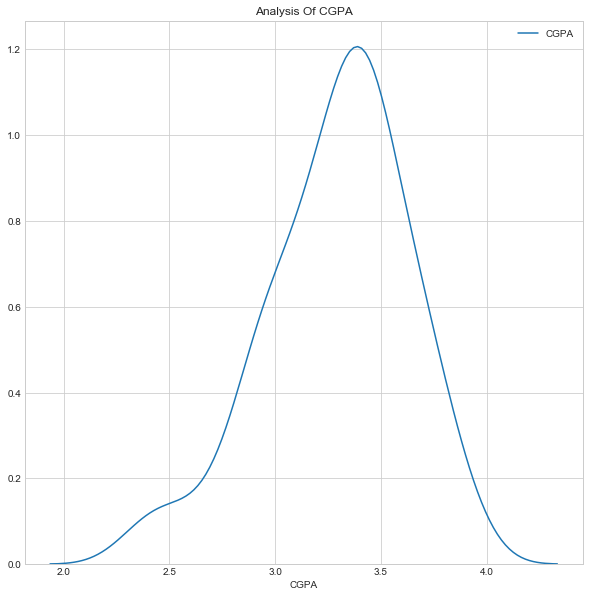

In [25]:
import seaborn as sns
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.set_style("whitegrid")
sns.kdeplot(fdf['CGPA'], ax = ax)
ax.set_title('Analysis Of CGPA')
ax.set_xlabel('CGPA')


In [26]:
fdf.columns = ['id','w','x','y','z']

In [27]:
fdf=fdf.fillna(0)

In [28]:
fdf.head()

,id,w,x,y,z
0,121440946.0,2.34,6.0,2.0,4
1,131440910.0,2.50,6.0,0.0,3
2,141340900.0,2.47,5.0,0.0,1
3,141440945.0,2.88,5.0,0.0,5
4,141440962.0,0.00,6.0,0.0,1


In [29]:
fdf.loc[fdf.w <= 3.00, 'Label'] = 1 #poor
fdf.loc[(fdf.w <= 3.50) & (fdf.w > 3), 'Label'] = 2 #good
fdf.loc[(fdf.w <= 3.75) & (fdf.w > 3.50), 'Label'] = 3 #better
fdf.loc[(fdf.w <= 4.00) & (fdf.w > 3.75), 'Label'] = 4 #best

In [30]:
fdf

,id,w,x,y,z,Label
0,121440946.0,2.340,6.0,2.0,4,1.0
1,131440910.0,2.500,6.0,0.0,3,1.0
2,141340900.0,2.470,5.0,0.0,1,1.0
3,141440945.0,2.880,5.0,0.0,5,1.0
4,141440962.0,0.000,6.0,0.0,1,1.0
5,151340894.0,2.840,8.0,3.0,1,1.0
6,151340897.0,3.530,6.0,1.0,6,3.0
7,151340898.0,3.770,6.0,3.0,3,4.0
8,151340901.0,3.246,5.0,2.0,4,2.0
9,151340902.0,3.460,8.0,4.0,2,2.0


In [31]:
X = fdf.iloc[:,1:5].values

In [32]:
y = fdf.iloc[:,5].values

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [34]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[0 3 0]
 [0 9 0]
 [0 3 0]]
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         3
        2.0       0.60      1.00      0.75         9
        3.0       0.00      0.00      0.00         3

avg / total       0.36      0.60      0.45        15



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
acc=classifier.score(X_train, y_train)

In [39]:
acc

0.5789473684210527

In [40]:
exampe_measures = np.array([3.5,6,3,1])
exampe_measures = exampe_measures.reshape(1,-1)
prediction=classifier.predict(exampe_measures)

In [41]:
prediction

array([2.])

In [42]:
def plot_conf_mat(lTrue, lPred, title):
    """ A function for plotting the confusion matrix given true and predicted labels."""
    cm = confusion_matrix(lTrue.astype(int), lPred.astype(int))
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show() 

[[0 3 0]
 [0 9 0]
 [0 3 0]]


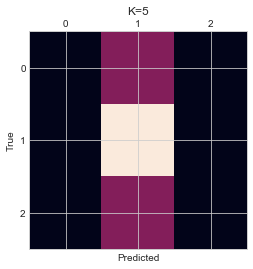

In [43]:
plot_conf_mat(y_test, y_pred, 'K=5')

In [44]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

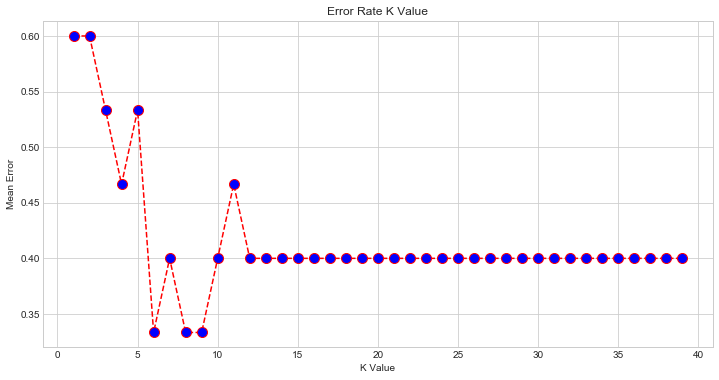

In [45]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

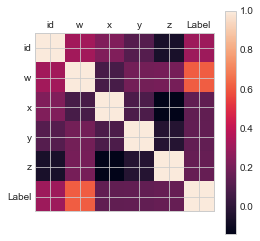

In [46]:
plt.matshow(fdf.corr())
plt.xticks(range(len(fdf.columns)), fdf.columns)
plt.yticks(range(len(fdf.columns)), fdf.columns)
plt.colorbar()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


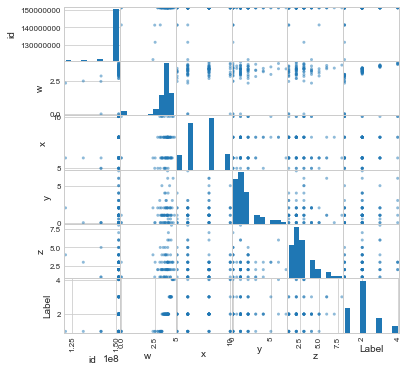

In [47]:
pd.scatter_matrix(fdf, figsize=(6, 6))
plt.show()